results/dsñ-1-exp01.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


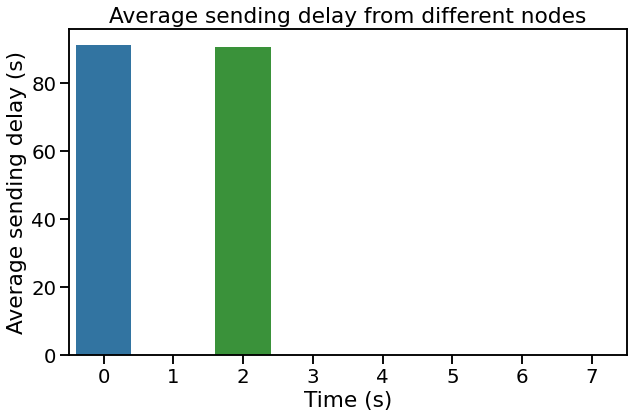

results/caso2-15.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


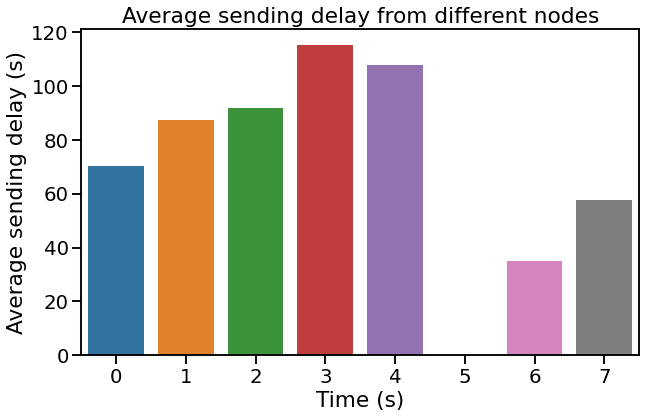

results/dsñ-2.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


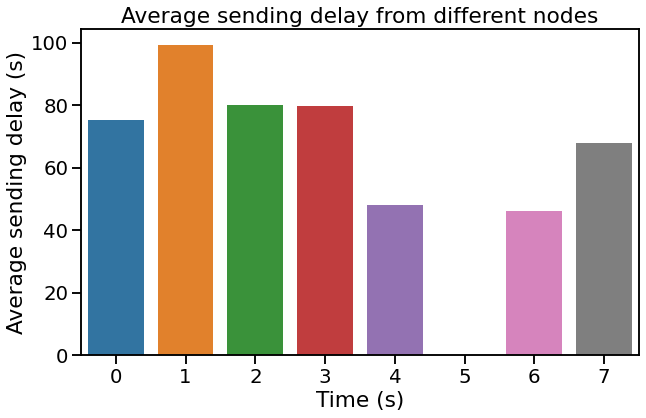

results/caso2.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


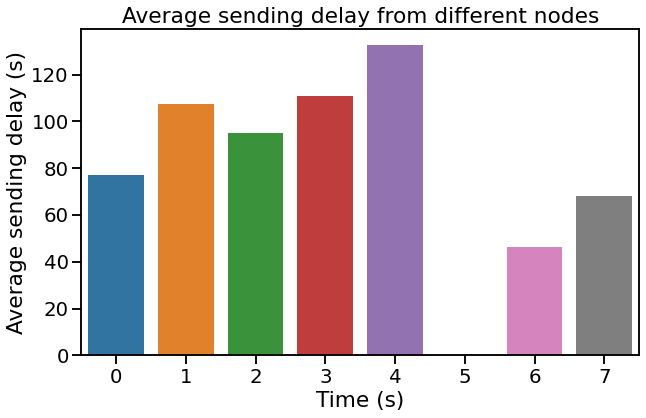

results/dsñ-1.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


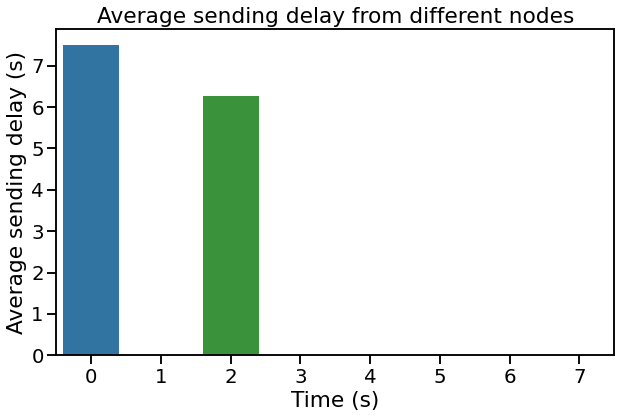

results/dsñ-2-exp05.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


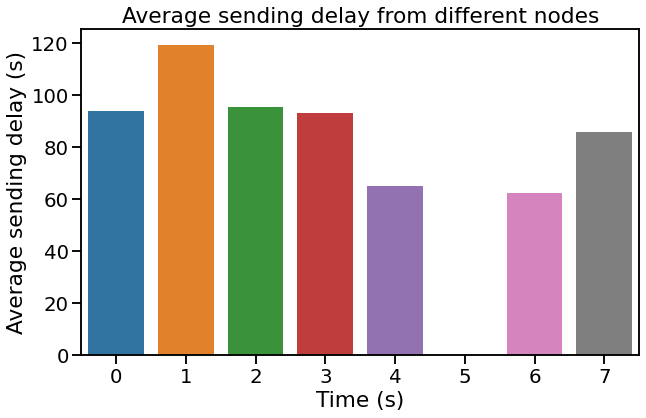

results/dsñ-1-exp05.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


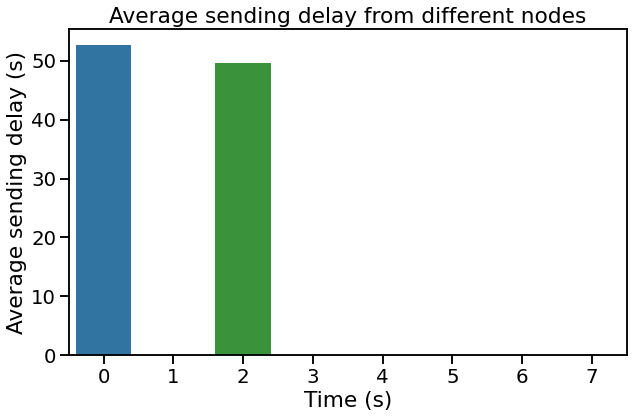

results/caso2-13.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


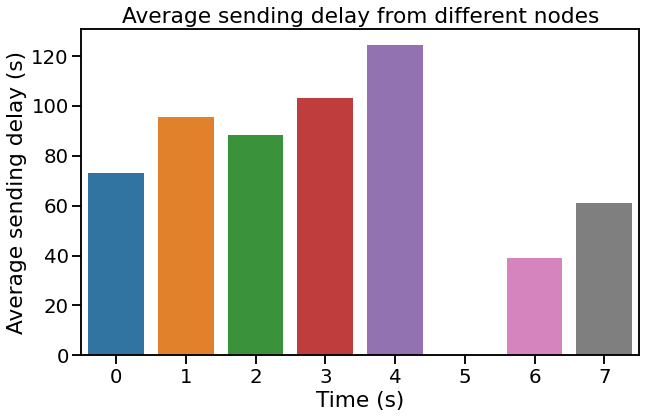

results/caso1.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


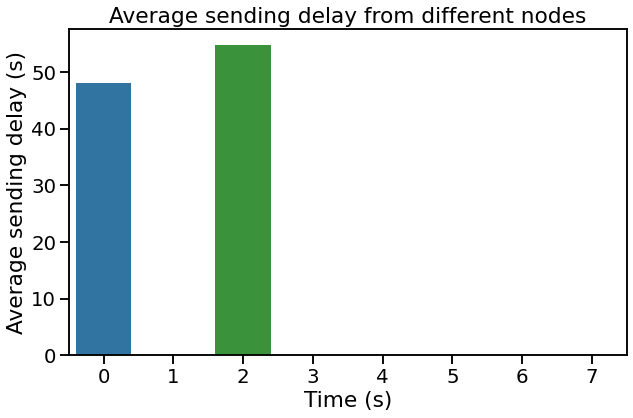

results/caso2-2.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


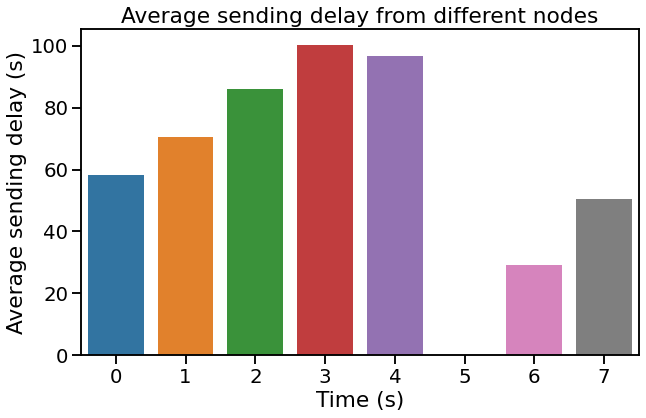

results/dsñ-2-exp01.csv
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuls/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


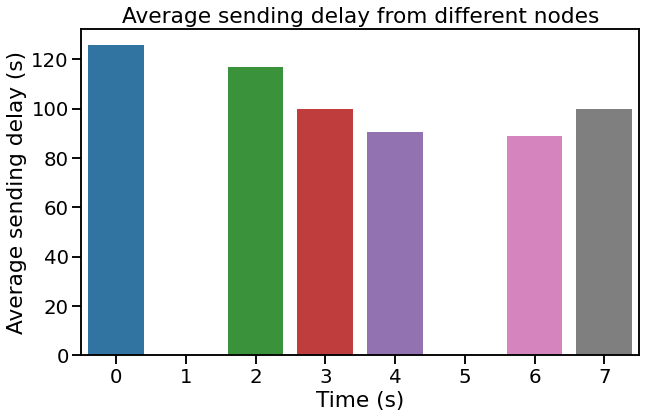

In [5]:
import matplotlib.pyplot as plt
from pandas import read_csv
from seaborn import set_context, barplot
from google.colab import files
from numpy import mean,array
from random import choice
from os import listdir

set_context(context='talk', font_scale=1.2)

DIR = 'results/'
FILES = listdir(DIR)

for file in FILES:
    if not file.__contains__('.csv'):
        continue
    FILENAME = DIR + file
    print(FILENAME)
    data = read_csv(FILENAME)

    #print(data)

    name = {
        'Delay'        : 0,
        'HopsVector'   : 0,
        'SourceVector' : 0
    }

    for i in range(0,len(data['name'])):
        if data['name'][i] in name.keys():
            name[data['name'][i]] = i

    def get_vectime (col):
        return (data['vectime'][col]).split(' ')

    def get_vecvalue (col):
        return (data['vecvalue'][col]).split(' ')

    last_dict = {}

    def compose (namee):
        vt = get_vectime(name[namee])
        vt = list(map(float,vt))
        vv = get_vecvalue(name[namee])
        if namee == 'Delay':
            vv = list(map(float,vv))
        else:
            vv = list(map(int,vv))
        aux = {namee : [vt , vv]}
        last_dict.update(aux)

    for n in name.keys():
        compose(n)

    #Ahora last_dict contiene "nombre del nodo" : [[vectime],[vecvalue]]

    N_NODES = 8
    delays = [[] for _ in range (0,N_NODES)]

    for n,m in zip(last_dict['Delay'][1] , last_dict['SourceVector'][1]):
        delays[m].append(n)

    for d in delays:
        if d == []:
            d = [0]

    """
    Not using plots for the moment
    plt.figure(figsize=(10,6))
    plt.xlabel('Source node')
    plt.ylabel('Nº of Hops')
    plt.title('Number of hops depending on source node')

    barplot(
        x=last_dict['SourceVector'][1],
        y=last_dict['HopsVector'][1]
    )
    """

    colors = ['tab:red','tab:green','tab:blue','tab:gray','tab:orange','tab:brown' , 'tab:pink']

    plt.figure(figsize=(10,6))

    delays = [mean(i) for i in delays]

    barplot(
        x= list(range(0,len(delays))),
        y= delays
    )

    plt.xlabel('Time (s)')
    plt.ylabel('Average sending delay (s)')
    plt.title('Average sending delay from different nodes')

    plt.savefig('plots/' + file.replace('.csv','') + '-delay' + '.png',
            bbox_inches ="tight",
            transparent = False,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

    plt.show()